In [1]:
# python -m spacy download en_core_web_sm
import os
import pandas as pd
import numpy as np
import numpy as np
import spacy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from spacy.matcher import PhraseMatcher
nlp=spacy.load('en_core_web_md')
matcher= PhraseMatcher(nlp.vocab)

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',100000)
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder


stop_words= list(pd.read_pickle('data/stop_words.pickle'))

In [2]:
data= pd.read_csv('data/news_dataset_v1.csv')
data.columns

Index(['Unnamed: 0', 'file_name', 'category', 'content'], dtype='object')

In [3]:
data['original_length']= data['content'].apply(lambda x: len(x))

In [4]:
data

Unnamed: 0 file_name       category  \
0              0   001.txt       business   
1              1   002.txt       business   
2              2   003.txt       business   
3              3   004.txt       business   
4              4   005.txt       business   
5              5   006.txt       business   
6              6   007.txt       business   
7              7   008.txt       business   
8              8   009.txt       business   
9              9   010.txt       business   
10            10   011.txt       business   
11            11   012.txt       business   
12            12   013.txt       business   
13            13   014.txt       business   
14            14   015.txt       business   
15            15   016.txt       business   
16            16   017.txt       business   
17            17   018.txt       business   
18            18   019.txt       business   
19            19   020.txt       business   
20            20   021.txt       business   
21            21   022.txt       business   
22            22   023.txt       business   
23            23   024.txt       business   
24            24   025.txt       business   
25            25   026.txt       business   
26            26   027.txt       business   
27            27   028.txt       business   
28            28   029.txt       business   
29            29   030.txt       business   
30            30   031.txt       business   
31            31   032.txt       business   
32            32   033.txt       business   
33            33   034.txt       business   
34            34   035.txt       business   
35            35   036.txt       business   
36            36   037.txt       business   
37            37   038.txt       business   
38            38   039.txt       business   
39            39   040.txt       business   
40            40   041.txt       business   
41            41   042.txt       business   
42            42   043.txt       business   
43            43   044.txt       business   
44            44   045.txt       business   
45            45   046.txt       business   
46            46   047.txt       business   
47            47   048.txt       business   
48            48   049.txt       business   
49            49   050.txt       business   
50            50   051.txt       business   
51            51   052.txt       business   
52            52   053.txt       business   
53            53   054.txt       business   
54            54   055.txt       business   
55            55   056.txt       business   
56            56   057.txt       business   
57            57   058.txt       business   
58            58   059.txt       business   
59            59   060.txt       business   
60            60   061.txt       business   
61            61   062.txt       business   
62            62   063.txt       business   
63            63   064.txt       business   
64            64   065.txt       business   
65            65   066.txt       business   
66            66   067.txt       business   
67            67   068.txt       business   
68            68   069.txt       business   
69            69   070.txt       business   
70            70   071.txt       business   
71            71   072.txt       business   
72            72   073.txt       business   
73            73   074.txt       business   
74            74   075.txt       business   
75            75   076.txt       business   
76            76   077.txt       business   
77            77   078.txt       business   
78            78   079.txt       business   
79            79   080.txt       business   
80            80   081.txt       business   
81            81   082.txt       business   
82            82   083.txt       business   
83            83   084.txt       business   
84            84   085.txt       business   
85            85   086.txt       business   
86            86   087.txt       business   
87            87   088.txt       business   
8

In [5]:
num=int(np.random.randint(low=0,high=len(data),size=1))
data['content'].loc[num]

'Collins to compete in Birmingham\n\nWorld and Commonwealth 100m champion Kim Collins will compete in the 60m at the Norwich Union Grand Prix in Birmingham on 18 February.\n\nThe St Kitts and Nevis star joins British Olympic relay gold medallists Jason Gardener and Mark Lewis-Francis. Sydney Olympic 100m champion and world indoor record holder Maurice Greene and Athens Olympic 100m silver medallist Francis Obikwelu will also take part. Collins ran in Birmingham at the 2003 World Indoor Championships. "I\'m looking forward to competing against such a strong field," he said. "I got a great reception form the crowd at the NIA when I won my 60m world indoor silver medal in 2003 and it will be really exciting to return to this venue." The world champion says he\'s in good shape but he isn\'t underestimating the home competition. "Jason Gardener and Mark Lewis-Francis are Olympic gold medallists now and I\'m sure they\'ll be aiming to win in front of their home supporters. "I\'m looking forw

## Removing symbols and Punctuations

In [6]:
data['content1']= data['content'].str.replace('\n+',' ')
data['content1']= data['content1'].str.replace(r"\'s","")
data['content1']= data['content1'].str.replace(r"[^A-Za-z0-9\s-]",'')
data['content1']= data['content1'].str.replace(r"[0-9]+(['a-z']+)?",' ')
data['content1']= data['content1'].str.replace(r'\s?(-+)\s',' ')
data['content1']= data['content1'].str.replace(r'\s\s','')
data['content1']= data['content1'].str.replace(r'-\w[-]\w+','')
data['content1']= data['content1'].str.replace(r'-',' ')

num=int(np.random.randint(low=0,high=len(data),size=1))
# num=0

data['content1'][num]


'Gadget show heralds MPChristmas Partners of those who love their hi tech gear may want to get their presents in early as experts predict a gadget shortage this Christmas With Apple iPod topping wish lists again there may not be enough iPod minis to go round predicts Oliver Irish editor of gadget magazine Stuff The iPod mini is likely to be this year Tracey Island said Mr Irish Stuff has compiled a list of the top gadgets for and the iPod is at number one For anyone bewildered by the choice of gadgets on the market Stuff and What Hi Fi are hosting a best of gadget show in London this weekend Star of the show will be Sony Qrio Robot an all singing all dancing football playing man machine who can even hold intelligent conversations But he is not for sale and Sony has no commercial plans for the robot He will greet visitors and is flying in from Japan He probably has his own airplane seat that is how highly Sony prize him said Mr Irish Also on display will be a virtual keyboard which proj

## Performing Lemmatization and removing stop words

In [7]:
li=[]
for doc in nlp.pipe(data['content1'],disable=['tagger','parser','ner','textcat'],batch_size=4):
    li.append(' '.join([token.lemma_ for token in doc if token.lemma_ not in stop_words] ))

In [8]:
data['content2']=li

In [9]:
data['content2_length']= data['content2'].apply(lambda x: len(x))

In [10]:
import seaborn as sns
sns.set_style('whitegrid')

## What effect does Data Cleaning had on my Data

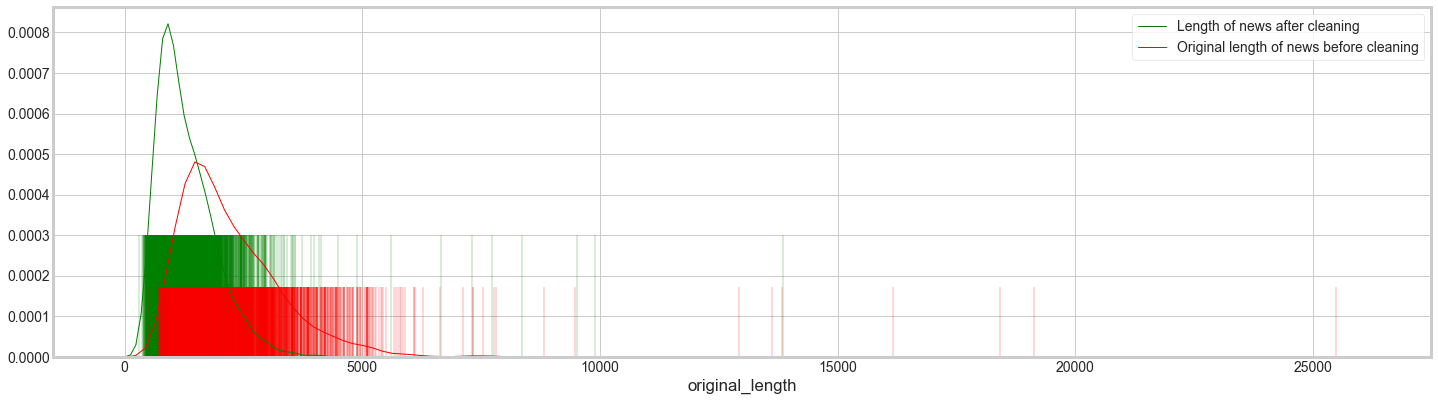

In [11]:
plt.figure(figsize=(22,6))
sns.distplot(a=data['content2_length'],
             color='green',
             label='Length of news after cleaning',
             rug=True,
             rug_kws={'height':0.35,'lw':0.3},
             kde_kws={'lw':1},
             hist=False
            )
sns.distplot(a=data['original_length'],
             color='red',
             label='Original length of news before cleaning',
             rug=True,
             hist=False,
             kde_kws={'lw':1},
             rug_kws={'height':0.20,'lw':0.3},

            )


plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000054A922C5F8>,
      dtype=object)

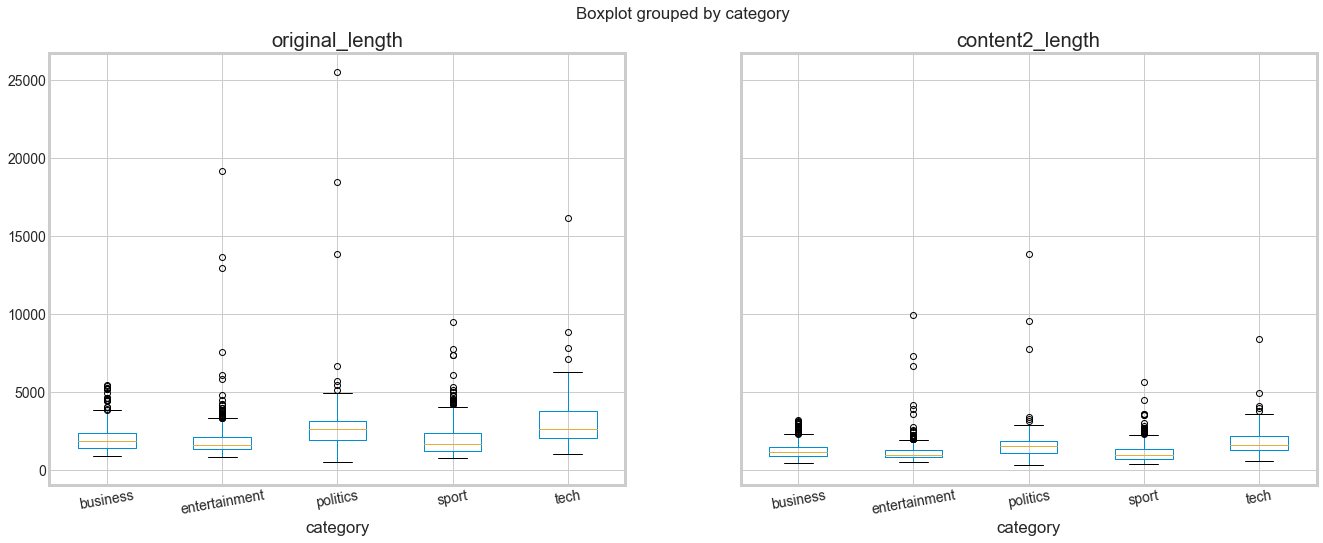

In [12]:
data[['category','original_length','content2_length']].boxplot(figsize=(22,8),by='category',
                                                           column=['original_length','content2_length'],rot=10)

In [13]:
train_group= data.groupby('category')

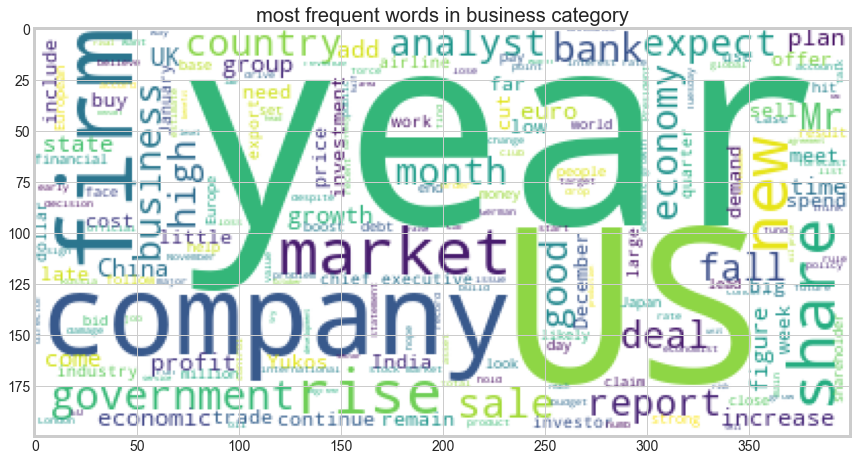

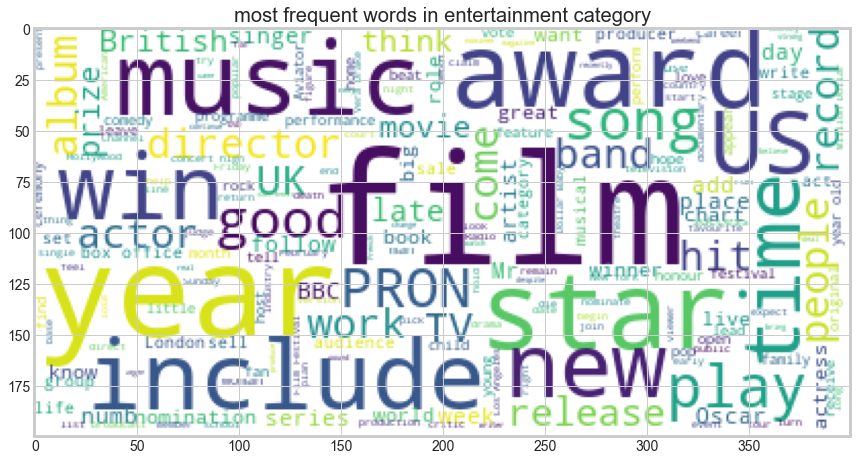

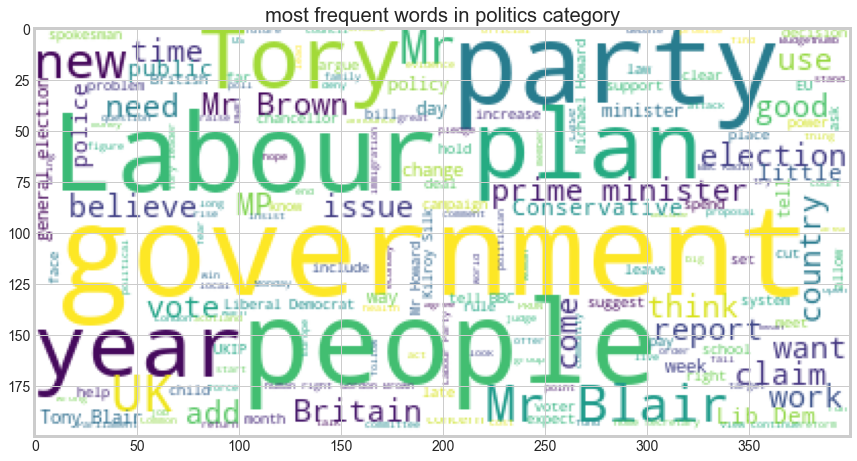

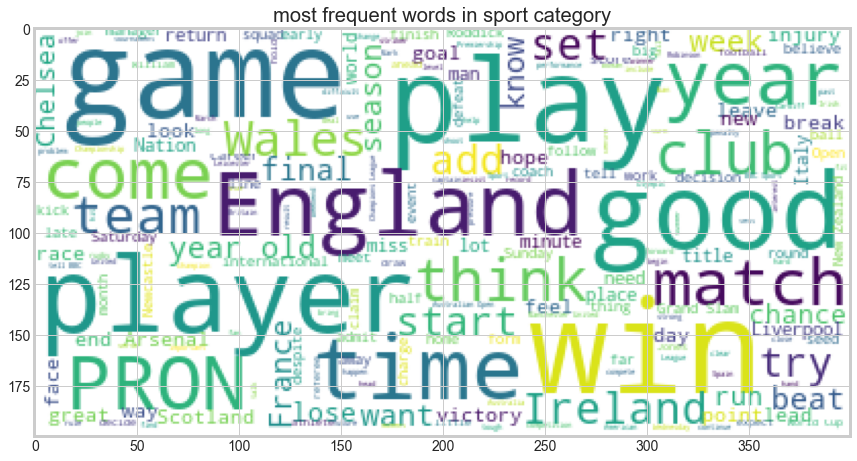

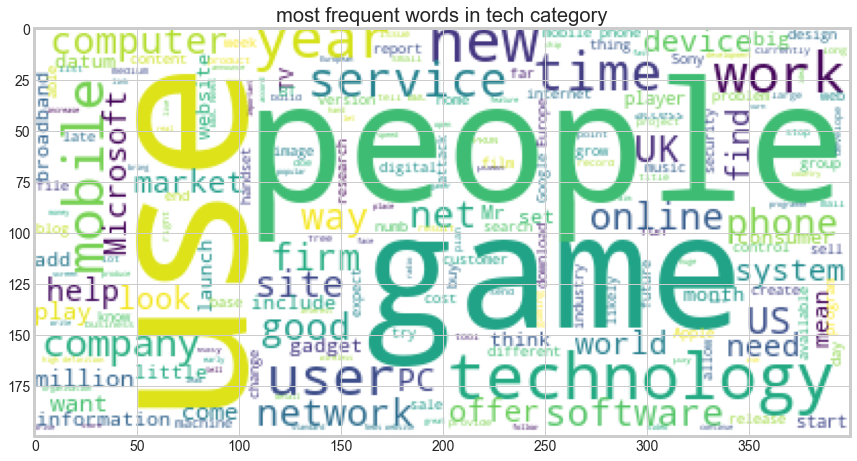

In [14]:
from wordcloud import WordCloud
for cat in ['business','entertainment','politics','sport','tech']:
    nr_d= train_group.get_group(f'{cat}')
    corpus= ' '.join(nr_d['content2'])
    plt.figure(figsize=(15,7))
    plt.title(f'most frequent words in {cat} category')
    wc= WordCloud(background_color='white',margin=1).generate(corpus)
    plt.imshow(wc)
plt.show()
    

##  Removing Nouns from Text

In [15]:
li=[]
for doc in nlp.pipe(data['content2'],disable=['tagger','parser','textcat'],batch_size=4):
    pattern= [ent.text for ent in doc.ents if ent.label_ in ['PERSON','GPE','ORG']]
    text= [ text for text in doc.text.split() if text not in pattern]
    li.append(' '.join(text))

    

In [25]:
pattern

['World Warcraft',
 'BBC',
 'Travis Anderson',
 'Texas',
 'Charles MacIntyre',
 'England',
 'Stuart Stanton Davies',
 'Pong',
 'Atari',
 'blogzine Print Culture',
 'Warcraft',
 'Warcraft',
 'EverCrack shiftswaking',
 'doe',
 'University',
 'MMORPG',
 'Ultima',
 'Warcraft',
 'Cambridge United',
 'Living Korea',
 'US',
 'MMORPG',
 'Ultima']

In [16]:
data['content3']= li

In [17]:
data['content3_length']= data['content3'].apply(lambda x: len(x))

## what effect it had on my data

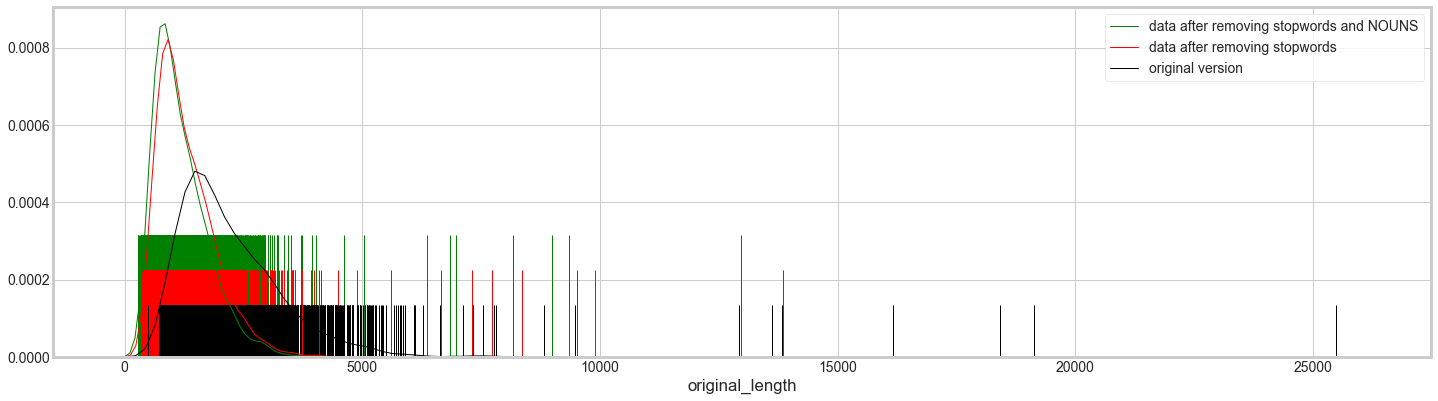

In [18]:
plt.figure(figsize=(22,6))

sns.distplot(a=data['content3_length'],
             color='green',
             label='data after removing stopwords and NOUNS',
             rug=True,
             rug_kws={'height':0.35,'lw':1},
             kde_kws={'lw':1},
             hist=False
            )
sns.distplot(a=data['content2_length'],
             color='red',
             label='data after removing stopwords',
             rug=True,
             hist=False,
             kde_kws={'lw':1},
             rug_kws={'height':0.25,'lw':1},

            )
sns.distplot(a=data['original_length'],
             color='black',
             label='original version ',
             rug=True,
             rug_kws={'height':0.15,'lw':1},
             kde_kws={'lw':1},
             hist=False
            )

plt.legend()

In [19]:
data.columns

Index(['Unnamed: 0', 'file_name', 'category', 'content', 'original_length',
       'content1', 'content2', 'content2_length', 'content3',
       'content3_length'],
      dtype='object')

In [20]:
display(data.columns)
data

Index(['Unnamed: 0', 'file_name', 'category', 'content', 'original_length',
       'content1', 'content2', 'content2_length', 'content3',
       'content3_length'],
      dtype='object')

Unnamed: 0 file_name       category  \
0              0   001.txt       business   
1              1   002.txt       business   
2              2   003.txt       business   
3              3   004.txt       business   
4              4   005.txt       business   
5              5   006.txt       business   
6              6   007.txt       business   
7              7   008.txt       business   
8              8   009.txt       business   
9              9   010.txt       business   
10            10   011.txt       business   
11            11   012.txt       business   
12            12   013.txt       business   
13            13   014.txt       business   
14            14   015.txt       business   
15            15   016.txt       business   
16            16   017.txt       business   
17            17   018.txt       business   
18            18   019.txt       business   
19            19   020.txt       business   
20            20   021.txt       business   
21            21   022.txt       business   
22            22   023.txt       business   
23            23   024.txt       business   
24            24   025.txt       business   
25            25   026.txt       business   
26            26   027.txt       business   
27            27   028.txt       business   
28            28   029.txt       business   
29            29   030.txt       business   
30            30   031.txt       business   
31            31   032.txt       business   
32            32   033.txt       business   
33            33   034.txt       business   
34            34   035.txt       business   
35            35   036.txt       business   
36            36   037.txt       business   
37            37   038.txt       business   
38            38   039.txt       business   
39            39   040.txt       business   
40            40   041.txt       business   
41            41   042.txt       business   
42            42   043.txt       business   
43            43   044.txt       business   
44            44   045.txt       business   
45            45   046.txt       business   
46            46   047.txt       business   
47            47   048.txt       business   
48            48   049.txt       business   
49            49   050.txt       business   
50            50   051.txt       business   
51            51   052.txt       business   
52            52   053.txt       business   
53            53   054.txt       business   
54            54   055.txt       business   
55            55   056.txt       business   
56            56   057.txt       business   
57            57   058.txt       business   
58            58   059.txt       business   
59            59   060.txt       business   
60            60   061.txt       business   
61            61   062.txt       business   
62            62   063.txt       business   
63            63   064.txt       business   
64            64   065.txt       business   
65            65   066.txt       business   
66            66   067.txt       business   
67            67   068.txt       business   
68            68   069.txt       business   
69            69   070.txt       business   
70            70   071.txt       business   
71            71   072.txt       business   
72            72   073.txt       business   
73            73   074.txt       business   
74            74   075.txt       business   
75            75   076.txt       business   
76            76   077.txt       business   
77            77   078.txt       business   
78            78   079.txt       business   
79            79   080.txt       business   
80            80   081.txt       business   
81            81   082.txt       business   
82            82   083.txt       business   
83            83   084.txt       business   
84            84   085.txt       business   
85            85   086.txt       business   
86            86   087.txt       business   
87            87   088.txt       business   
8

In [21]:
df= data[['category','original_length','content2_length','content3_length']]
df

category  original_length  content2_length  content3_length
0          business             2560             1518             1370
1          business             2252             1375             1276
2          business             1552              989              797
3          business             2412             1444             1384
4          business             1570              969              759
5          business             1187              799              775
6          business             1669              974              948
7          business             1922             1171             1004
8          business             1494              979              935
9          business             1449              907              844
10         business             1144              667              595
11         business             1847             1181             1117
12         business             1830             1154              970
13         business             2981             1891             1761
14         business             3808             2300             2215
15         business             1393              799              757
16         business             1299              769              733
17         business             1002              559              484
18         business             1733             1149             1085
19         business             3854             2003             1997
20         business             2046             1246             1201
21         business             1933             1210             1194
22         business             1267              762              749
23         business             1954             1116             1053
24         business             2704             1680             1436
25         business             1829             1133             1092
26         business             1620              921              815
27         business             1249              817              744
28         business             2492             1493             1387
29         business             2487             1461             1388
30         business             1888             1206             1113
31         business             1733             1064              917
32         business             1348              763              725
33         business             1780             1081              956
34         business             1217              774              718
35         business             2130             1266             1194
36         business             2462             1414             1323
37         business              930              551              541
38         business             1252              763              620
39         business             1355              821              722
40         business             2016             1269             1190
41         business             1399              833              763
42         business             1202              767              767
43         business             2489             1523             1469
44         business             1802             1131             1045
45         business             1828             1159             1127
46         business             1566              836              731
47         business             1668             1004              914
48         business             3551             1880             1615
49         business             1918             1231             1115
50         business             1783             1066              882
51         business             2991             1793             1674
52         business             1382              752              712
53         business             1438              853              779
54         business             2052             1093             1062
55         business             147

In [22]:
fig= go.Figure()
fig.add_trace(
    go.Box(y= df['original_length'],name='Original length')
)
fig.add_trace(
    go.Box(y= df['content2_length'],name='content length after cleaning structure')
)
fig.add_trace(
    go.Box(y= df['content3_length'],name=' content length after cleaning stopwords and lemma')
)
fig.update_traces(
    boxpoints='outliers',
    jitter=0
)
fig.show()

In [23]:
data['content3']= data['content3']

In [24]:
data.to_csv('data/cleaned_news_dataset.csv')